# teeko-game

by:Karen Melanie Sasari Alborta -- Antonio Medina Padilla

### Librerias a importar

In [ ]:
#Math and Arrays and graphics
import math
import matplotlib.pyplot as plt
import numpy as np
import random 
import copy
from matplotlib import colors

#Heuristic
from itertools import groupby 



### Function view board

In [ ]:
def draw_map(my_map,p1,p2):
    xlen = len(my_map[0])
    ylen = len(my_map)
    colormap = colors.ListedColormap(["white"])
    
    # set ticks top and bottom
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    plt.figure()
    im = plt.imshow(my_map, cmap = colormap)
    ax = plt.gca();

    # Major ticks
    ax.set_xticks(np.arange(0, xlen, 1))
    ax.set_yticks(np.arange(0, ylen, 1))

    # Labels for major ticks
    x = ["A","B","C","D","E"]
    y = [1,2,3,4,5]
    ax.set_xticklabels(y)
    ax.set_yticklabels(x)

    # Minor ticks
    ax.set_xticks(np.arange(-.5, xlen, 1), minor=True)
    ax.set_yticks(np.arange(-.5, ylen, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    for piece in p1.pieces:
        ax.plot(piece[0],piece[1], marker="o", markersize=22,  color='black')
    for piece in p2.pieces:
        ax.plot(piece[0],piece[1], marker="o", markersize=22,  color='red') 
        
    plt.show()


### Classes fot the game

In [ ]:
class State:
    def __init__(self):
        self.board = np.zeros(shape=(5,5), dtype=np.int32)
        self.player= None
        
class Player:
    def __init__(self):
        self.value = 0
        self.name = None
        self.pieces = []
        
class Action:
    def __init__(self):
        self.piece=None
        self.placeMove=None

### Extra input output functions for the player

In [ ]:
def validate_place(x_pos, y_pos, board):
    if(x_pos>=0 and x_pos<5 and y_pos>=0 and y_pos<5):
        if(board[x_pos][y_pos]==0):
            return True
    return False

def move(x_pos, y_pos, new_x_pos, new_y_pos, player, state):
    if (x_pos==new_x_pos and y_pos==new_y_pos):
        print("Posiciones iguales, vuelva a intentar..")
        return False
    if (state.board[x_pos][y_pos]==player.value):
        if(state.board[new_x_pos][new_y_pos]==0):
            adjacentPlaces = possible_moves(x_pos, y_pos, state.board)
            if [new_x_pos, new_y_pos] in adjacentPlaces:
                state.board[new_x_pos][new_y_pos]=player.value
                state.board[x_pos][y_pos]=0
                return True
            else:
                print("Destino no adyacente, vuelva a intentar..")
                return False
        else:
            print("Destino ocupado, vuelva a intentar..")
            return False
    else:
        print("ficha seleccionada vacia o del jugador oponente, vuelva a intentar..")
        return False

def possible_moves(x_pos, y_pos, board):
    validMoves = []
    AllMoves = [[0, -1], [0, +1], [-1, 0] ,[+1, 0], [-1, +1], [+1, -1], [-1, -1], [+1, +1]]

    for i in AllMoves:
        x = x_pos + i[0]
        y = y_pos + i[1]

        if( 0 <= x <= 4 and 0 <= y <= 4):
            if(validate_place(x,y, board)==True):
                validMoves.append([x,y]) 
    return validMoves

def transform_values(pos):
    rows = {"A":0,"B":1,"C":2,"D":3,"E":4}
    columns = {"1":0,"2":1,"3":2,"4":3,"5":4}  
    x_pos=rows[pos[0]]
    y_pos=columns[pos[1]]
    return x_pos, y_pos

def return_values(pos):
    rows = {0:"A",1:"B",2:"C",3:"D",4:"E",10:"0"}
    columns = {0:1,1:2,2:3,3:4,4:5, 10:"0"}  
    x_pos=rows[pos[0]]
    y_pos=columns[pos[1]]
    return x_pos, y_pos

def question_place(player):
    print(f'{player.name} Ingresa la posicion xy ejm:A1 :')
    pos = input()
    x_pos, y_pos = transform_values(pos)
    return x_pos, y_pos


def question_move_place(player):
    print(f'{player.name} Ingresa la posicion de la ficha a mover xy ejem:A1:')
    pos = input()
    x_pos, y_pos = transform_values(pos)
    print(f'{player.name} Ingresa la posicion a la cual se movera xy ejem:A1:')
    pos = input()
    new_x_pos, new_y_pos = transform_values(pos)
    return x_pos, y_pos, new_x_pos, new_y_pos
 
def question_turn():
    print("Ingresa que piezas deseas jugar: N o R")
    piece = input()
    if piece=="N":
          return 1
    return -1

### Functions to obtain actions

In [ ]:
def get_initial_actions(state):
    actions=[]
    board=state.board
    for x in range(5):
        for y in range(5):
            if board[x][y]==0:
                action=Action()
                action.piece=[10,10]
                action.placeMove=[x,y]
                actions.append(action)  
    return actions

def get_actions(state):
    actions = []
    player=state.player
    pieces=player.pieces
    for piece in pieces:
        places = possible_moves(piece[0], piece[1],state.board)
        for place in places:
            action=Action()
            action.piece=piece
            action.placeMove=place
            actions.append(action)        
    return actions
    
def get_total_actions(state):
    value=state.player.value
    board=state.board
    count=len(np.where(board==value)[0])
    #print(count)
    if(count==4):
        return get_actions(state)
    else:
        return get_initial_actions(state)
    
# def print_actions(actions):
#     for action in actions:
#         x_pos, y_pos=return_values(action.piece)
#         a_pos, b_pos=return_values(action.placeMove)
#         print(f'{x_pos}{y_pos} mover a {a_pos}{b_pos}')
        
def print_action(action):
    x_pos, y_pos=return_values(action.piece)
    a_pos, b_pos=return_values(action.placeMove)
    print(f'{x_pos}{y_pos} mover a {a_pos}{b_pos}')

### Herustic functions

In [ ]:
def count_positive_negative_in_row(row):
    count_positive = 0
    count_negative = 0
    for i in row:
        if not (i == 0):
            if i > 0:
                count_positive += 1
            else:
                count_negative +=1
    return [count_positive ,count_negative]

def is_consecutive(x, y):
    return (x == y) and not (x == 0)

def splitInArrays(row):
    return [list(g) for k,g in groupby(row,lambda x:x==0) if not k]

def count_consecutive_in_row(row):
    count_positive = 0
    count_negative = 0
    listPositives = [ x if x == 1 else 0 for x in row ] # convierte los -1 en 0, me quedo solo con 1s
    listNegatives = [ 1 if x == -1 else 0 for x in row ] # convierte los 1 en 0 y despues los -1 en 1s, me quedo solo con 1s

    listPositivesArrays= splitInArrays(listPositives) #separa por 0s, [1,1,0,1,1] => [[1,1][1,1]]
    listNegativesArrays= splitInArrays(listNegatives) #separa por 0s, [1,1,0,1,1] => [[1,1][1,1]]

    respPositivos = []
    for arr in listPositivesArrays:
        respPositivos.append(sum(arr))
    respPositivos =  0 if respPositivos == [] else math.prod(respPositivos)  

    respNegativos = []
    for arr in listNegativesArrays:
        respNegativos.append(sum(arr))
    respNegativos =  0 if respNegativos == [] else math.prod(respNegativos) 
    return [respPositivos, respNegativos ]

def eval_row(row):
    cantPos, cantNeg = count_positive_negative_in_row(row)
    cantPosConsect, cantNegConsect = count_consecutive_in_row(row)
    return cantPos * cantPosConsect - cantNeg*cantNegConsect

def eval_rows(board):
    res=0
    for i, x in enumerate(board):
        resRow = eval_row(x)
        res=res+resRow
    return res

def eval_columns(board):
    boardRotate = np.transpose(board)
    res=0
    for i, y in enumerate(boardRotate):
        resColum = eval_row(y)
        res=res+resColum
    return res

def eval_board(board):
    return eval_rows(board) + eval_columns(board)

### Function result
if we are in the initial face, the value of the piece in action will be null, in this case we use the value [10,10].

In [ ]:
def result(state, action):
    result_state=copy.deepcopy(state)
    
    if(action.piece==[10,10]):
        result_state.board[action.placeMove[0]][action.placeMove[1]]=result_state.player.value
        result_state.player.pieces.append([action.placeMove[0],action.placeMove[1]])
    else:
        result_state.board[action.piece[0]][action.piece[1]]=0
        result_state.board[action.placeMove[0]][action.placeMove[1]]=result_state.player.value
        result_state.player.pieces.remove([action.piece[0],action.piece[1]])
        result_state.player.pieces.append([action.placeMove[0],action.placeMove[1]])
        
    return result_state

### Algorithm minmax with depth

In [61]:
max_depth = 2
def cut_off(state, depth):
    return depth == max_depth


def min_max_with_depth(state):
    values=[]
    player=state.player
    actions=get_total_actions(state)
    #Player max
    if(state.player.value == 1):
        for action in actions:
            v=min_value(result(copy.copy(state),action), 0)
            values.append(v)
            index=np.argmax(values)
    #Player min       
    if(state.player.value == -1):
        for action in actions:
            v=max_value(result(copy.copy(state),action),0)
            values.append(v)
            index=np.argmin(values)
            
        
    return actions[index]

def EVAL(state):
    #obtain the heuristic
    res_eval=eval_board(state.board)
    
    return res_eval

def min_value(state, depth):
    state.player=Player()
    state.player.value=-1
    state.player.name="Min"
    if cut_off(state, depth):
        return EVAL(state)
    v = math.inf
    actions=get_total_actions(state)
    for action in actions:
        v = min(v, max_value(result(copy.deepcopy(state), action),  depth+1))
    return v


def max_value(state,depth):
    state.player=Player()
    state.player.value=1
    state.player.name="Max"
    if cut_off(state, depth):
        return EVAL(state)
    v = -math.inf
    actions=get_total_actions(state)
    for action in actions:
        v = max(v, min_value(result(copy.deepcopy(state), action),  depth+1))
    return v

Ingresa que piezas deseas jugar: N o R
R
Tu eres Min
---------------------------------------------
Turno:  Max


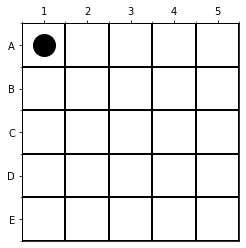

---------------------------------------------
Turno:  Min
Min Ingresa la posicion xy ejm:A1 :
B1


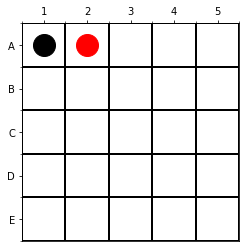

---------------------------------------------
Turno:  Max


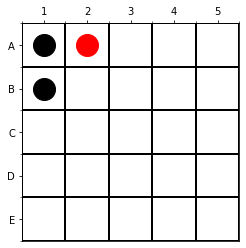

---------------------------------------------
Turno:  Min
Min Ingresa la posicion de la ficha a mover xy ejem:A1:
C3
Min Ingresa la posicion a la cual se movera xy ejem:A1:


In [ ]:
#player Max
pmax=Player()
pmax.value=1
pmax.name="Max"


#Player Min
pmin=Player()
pmin.value=-1
pmin.name="Min"

def change_player(state):
     if state.player.name == "Max":
        return pmin
     else:
        return pmax
    
    
game_state=State()
game_state.player=pmax

turn=question_turn()

if(turn==1):
    print("Tu eres Max ")
    for i in range(5):
        print("---------------------------------------------")
        print("Turno: ",game_state.player.name)
        #actions = get_total_actions(game_state)
        #print_actions(actions)
        if game_state.player.value == -1:
            best_action = min_max_with_depth(game_state)
            print_action(best_action)
            game_state = result(game_state, best_action)
            pmin=game_state.player
            game_state.player = pmax
        else:
            actionPlayer=Action()
            if(len(pmax.pieces)==0):
                x_pos, y_pos= question_place(pmax)
                while(validate_place(x_pos,y_pos, game_state.board)==False):
                    print("lugar invalido.. vuelve a intentar")
                    x_pos,y_pos=question_place(pmax)
                actionPlayer.piece=[10,10]
                actionPlayer.placeMove=[x_pos,y_pos]
            else:

                x_pos, y_pos, new_x_pos, new_y_pos=question_move_place(pmax)
                while(move(x_pos, y_pos, new_x_pos, new_y_pos, pmax, game_state)==False):
                    x_pos, y_pos, new_x_pos, new_y_pos=question_move_place(pmax)

                actionPlayer.piece=[x_pos,y_pos]
                actionPlayer.placeMove=[new_x_pos,new_y_pos]

            game_state = result(game_state, actionPlayer)
            pmax=game_state.player
            game_state.player = pmin
        draw_map(game_state.board,pmax,pmin)
        game_state.player = change_player(game_state)

else:
    print("Tu eres Min")
    for i in range(5):
        print("---------------------------------------------")
        print("Turno: ",game_state.player.name)
        actions = get_total_actions(game_state)
        #print_actions(actions)
        if game_state.player.value == 1:
            best_action = min_max_with_depth(game_state)
            #print_action(best_action)
            game_state = result(game_state, best_action)
            pmax=game_state.player
            #game_state.player = pmin
        else:
            actionPlayer=Action()
            if(len(pmin.pieces)==0):
                x_pos, y_pos= question_place(pmin)
                while(validate_place(x_pos,y_pos, game_state.board)==False):
                    print("lugar invalido.. vuelve a intentar")
                    x_pos,y_pos=question_place(pmin)
                actionPlayer.piece=[10,10]
                actionPlayer.placeMove=[x_pos,y_pos]
            else:

                x_pos, y_pos, new_x_pos, new_y_pos=question_move_place(pmin)
                while(move(x_pos, y_pos, new_x_pos, new_y_pos, pmin, game_state)==False):
                    x_pos, y_pos, new_x_pos, new_y_pos=question_move_place(pmin)

                actionPlayer.piece=[x_pos,y_pos]
                actionPlayer.placeMove=[new_x_pos,new_y_pos]

            game_state = result(game_state, actionPlayer)
            pmin=game_state.player
            #game_state.player = pmax

        draw_map(game_state.board,pmax,pmin)       
        game_state.player = change_player(game_state)

Ingresa que piezas deseas jugar: N o R
N
Tu eres Max 
---------------------------------------------
Turno:  Max
Max Ingresa la posicion xy ejm:A1 :
A1


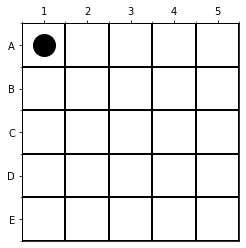

---------------------------------------------
Turno:  Min
00 mover a A2


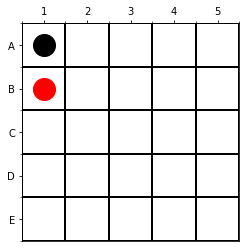

---------------------------------------------
Turno:  Max
Max Ingresa la posicion de la ficha a mover xy ejem:A1:
C4
Max Ingresa la posicion a la cual se movera xy ejem:A1:


KeyboardInterrupt: Interrupted by user

In [56]:
game2()

In [59]:
#Min max with depth cutoff
max_depth = 2
def cut_off(state, depth):
    return depth == max_depth


def min_max_with_depth_prunning(state):
    values=[]
    player=state.player
    actions=get_total_actions(state)
    #Player max
    if(state.player.value == 1):
        for action in actions:
            v=min_value(result(copy.copy(state),action),-math.inf, math.inf, 0)
            values.append(v)
            index=np.argmax(values)
    #Player min       
    if(state.player.value == -1):
        for action in actions:
            v=max_value(result(copy.copy(state),action),-math.inf, math.inf, 0)
            values.append(v)
            index=np.argmin(values)
            
        
    return actions[index]

def EVAL(state):
    res_eval=0

    res_eval=eval_board(state.board)

    return res_eval

def min_value(state,alpha, beta, depth):
    state.player=Player()
    state.player.value=-1
    state.player.name="Min"
    if cut_off(state, depth):
        return EVAL(state)
    v = math.inf
    actions=get_total_actions(state)
    for action in actions:
        v = min(v, max_value(result(copy.deepcopy(state), action), alpha, beta, depth+1))
        #prunning
        if v<=alpha:
            return v
        beta = min(beta, v)
        
    return v


def max_value(state,alpha, beta, depth):
    state.player=Player()
    state.player.value=1
    state.player.name="Max"
    if cut_off(state, depth):
        return EVAL(state)
    v = -math.inf
    actions=get_total_actions(state)
    for action in actions:
        v = max(v, min_value(result(copy.deepcopy(state), action), alpha, beta, depth+1))
        #prunning
        if v>=beta:
            return v
        beta = max(alpha, v)
        
    return v

In [58]:
#Player Game Max
pmax=Player()
pmax.value=1
pmax.name="Max"


#Player Game Min
pmin=Player()
pmin.value=-1
pmin.name="Min"

def change_player(state):
     if state.player.name == "Max":
        return pmin
     else:
        return pmax




game_state=State()
game_state.player=pmax

for i in range(5):
    print("---------------------------------------------")
    print("Turno: ",game_state.player.name)
    actions = get_total_actions(game_state)
    #print_actions(actions)
    if game_state.player.value == 1:
        best_action = min_max_with_depth_prunning(game_state)
        print_action(best_action)
        game_state = result(game_state, best_action)
    else:
        actionPlayer=Action()
        if(len(pmin.pieces)==0):
            x_pos, y_pos= question_place(pmin)
            while(validate_place(x_pos,y_pos, game_state.board)==False):
                print("lugar invalido.. vuelve a intentar")
                x_pos,y_pos=question_place(pmin)
            actionPlayer.piece=[10,10]
            actionPlayer.placeMove=[x_pos,y_pos]
        else:

            x_pos, y_pos, new_x_pos, new_y_pos=question_move_place(pmin)
            while(move(x_pos, y_pos, new_x_pos, new_y_pos, pmin, game_state)==False):
                x_pos, y_pos, new_x_pos, new_y_pos=question_move_place(pmin)

            actionPlayer.piece=[x_pos,y_pos]
            actionPlayer.placeMove=[new_x_pos,new_y_pos]

        game_state = result(game_state, actionPlayer)
    print(game_state.board)        
    game_state.player = change_player(game_state)


---------------------------------------------
Turno:  Max
00 mover a A2
[[0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
---------------------------------------------
Turno:  Min
Min Ingresa la posicion xy ejm:A1 :
B1
[[ 0  1  0  0  0]
 [-1  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
---------------------------------------------
Turno:  Max
00 mover a A3
[[ 0  1  1  0  0]
 [-1  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
---------------------------------------------
Turno:  Min
Min Ingresa la posicion xy ejm:A1 :
C2
[[ 0  1  1  0  0]
 [-1  0  0  0  0]
 [ 0 -1  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
---------------------------------------------
Turno:  Max
00 mover a A1
[[ 1  1  1  0  0]
 [-1  0  0  0  0]
 [ 0 -1  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
